## Jupyter notebook for illustrating the overlaps between A/B compartments and SNPs
This notebook is the code for illustrating overlaps between A/B compartments and SNPs from the time course Hi-C used in the paper **"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre. 

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load packages required

In [1]:
library(ggplot2)


### load SNPs data for rheumatoid arthritis 

In [2]:
snps <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/RA_CREDIBLE_SNPS.txt', header=F)
snps_partial <- snps[,1:3]
names(snps_partial) <- c('chr','start','end')
snps_partial_forcompare <- snps_partial
snps_partial_forcompare$label <- 'SNPs'
snps_chr1 <- subset(snps_partial, snps_partial$chr %in% 'chr1')
snps_chr1$ymin <- 0
snps_chr1$ymax <- 0.4
snps_chr1$id<- 1:dim(snps_chr1)[1]


### load A/B compartments data for time 0 mims, 20 mins, 1 hr, 4 hrs and 24 hrs

In [3]:
compartment_T0_chr1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/compartment_T0_chr1.txt', header=F, row.names=1)
compartment_T20_chr1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/compartment_T20_chr1.txt', header=F, row.names=1)
compartment_T1H_chr1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/compartment_T1H_chr1.txt', header=F, row.names=1)
compartment_T4H_chr1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/compartment_T4H_chr1.txt', header=F, row.names=1)
compartment_T24H_chr1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/compartment_T24H_chr1.txt', header=F, row.names=1)



In [4]:
names(compartment_T0_chr1) <- c('chr','start','end','strand','value')
names(compartment_T20_chr1) <- c('chr','start','end','strand','value')
names(compartment_T1H_chr1) <- c('chr','start','end','strand','value')
names(compartment_T4H_chr1) <- c('chr','start','end','strand','value')
names(compartment_T24H_chr1) <- c('chr','start','end','strand','value')


In [5]:
compartment_T0_chr1_data <- compartment_T0_chr1[,c('start','end','value')]
compartment_T20_chr1_data <- compartment_T20_chr1[,c('start','end','value')]
compartment_T1H_chr1_data <- compartment_T1H_chr1[,c('start','end','value')]
compartment_T4H_chr1_data <- compartment_T4H_chr1[,c('start','end','value')]
compartment_T24H_chr1_data <- compartment_T24H_chr1[,c('start','end','value')]



### prepare data for illustration

In [6]:
nrow_T0 <- dim(compartment_T0_chr1_data)[1]
ncol_T0 <- dim(compartment_T0_chr1_data)[2]
nrow_T20 <- dim(compartment_T20_chr1_data)[1]
ncol_T20 <- dim(compartment_T20_chr1_data)[2]
nrow_T1H <- dim(compartment_T1H_chr1_data)[1]
ncol_T1H <- dim(compartment_T1H_chr1_data)[2]
nrow_T4H <- dim(compartment_T4H_chr1_data)[1]
ncol_T4H <- dim(compartment_T4H_chr1_data)[2]
nrow_T24H <- dim(compartment_T24H_chr1_data)[1]
ncol_T24H <- dim(compartment_T24H_chr1_data)[2]

In [7]:
compartment_T0_chr1_data$x <- 0.5*(compartment_T0_chr1_data$start + compartment_T0_chr1_data$end)
compartment_T20_chr1_data$x <- 0.5*(compartment_T20_chr1_data$start + compartment_T20_chr1_data$end)
compartment_T1H_chr1_data$x <- 0.5*(compartment_T1H_chr1_data$start + compartment_T1H_chr1_data$end)
compartment_T4H_chr1_data$x <- 0.5*(compartment_T4H_chr1_data$start + compartment_T4H_chr1_data$end)
compartment_T24H_chr1_data$x <- 0.5*(compartment_T24H_chr1_data$start + compartment_T24H_chr1_data$end)

compartment_T0_chr1_data$ymin <- sapply(seq.int(nrow_T0), function(i) min(0,compartment_T0_chr1_data$value[i]))
compartment_T0_chr1_data$ymax <- sapply(seq.int(nrow_T0), function(i) max(0,compartment_T0_chr1_data$value[i]))
compartment_T20_chr1_data$ymin <- sapply(seq.int(nrow_T20), function(i) min(0,compartment_T20_chr1_data$value[i]))
compartment_T20_chr1_data$ymax <- sapply(seq.int(nrow_T20), function(i) max(0,compartment_T20_chr1_data$value[i]))
compartment_T1H_chr1_data$ymin <- sapply(seq.int(nrow_T1H), function(i) min(0,compartment_T1H_chr1_data$value[i]))
compartment_T1H_chr1_data$ymax <- sapply(seq.int(nrow_T1H), function(i) max(0,compartment_T1H_chr1_data$value[i]))
compartment_T4H_chr1_data$ymin <- sapply(seq.int(nrow_T4H), function(i) min(0,compartment_T4H_chr1_data$value[i]))
compartment_T4H_chr1_data$ymax <- sapply(seq.int(nrow_T4H), function(i) max(0,compartment_T4H_chr1_data$value[i]))  
compartment_T24H_chr1_data$ymin <- sapply(seq.int(nrow_T24H), function(i) min(0,compartment_T24H_chr1_data$value[i]))
compartment_T24H_chr1_data$ymax <- sapply(seq.int(nrow_T24H), function(i) max(0,compartment_T24H_chr1_data$value[i]))  

In [8]:
compartment_T0_chr1_data$group <- 'A'
compartment_T0_chr1_data[compartment_T0_chr1_data$ymin <0, 'group'] <- 'B'
compartment_T0_chr1_data$id <- 1:nrow_T0

compartment_T20_chr1_data$group <- 'A'
compartment_T20_chr1_data[compartment_T20_chr1_data$ymin <0, 'group'] <- 'B'
compartment_T20_chr1_data$id <- 1:nrow_T20

compartment_T1H_chr1_data$group <- 'A'
compartment_T1H_chr1_data[compartment_T1H_chr1_data$ymin <0, 'group'] <- 'B'
compartment_T1H_chr1_data$id <- 1:nrow_T1H

compartment_T4H_chr1_data$group <- 'A'
compartment_T4H_chr1_data[compartment_T4H_chr1_data$ymin <0, 'group'] <- 'B'
compartment_T4H_chr1_data$id <- 1:nrow_T4H

compartment_T24H_chr1_data$group <- 'A'
compartment_T24H_chr1_data[compartment_T24H_chr1_data$ymin <0, 'group'] <- 'B'
compartment_T24H_chr1_data$id <- 1:nrow_T24H

### show the overlap between AB compartment and SNPs

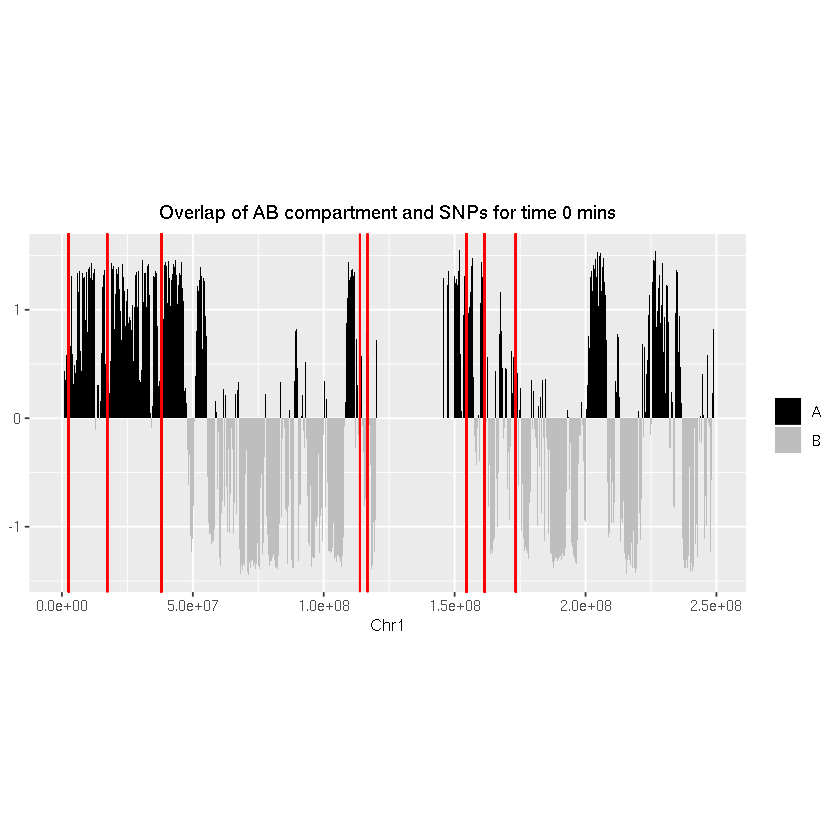

In [9]:

ggplot() +  geom_rect(data=compartment_T0_chr1_data, aes(xmin=start,xmax=end, ymin=ymin, ymax=ymax, fill=group, group=id)) + scale_fill_manual(values=c('black','grey')) +
 geom_rect(data=snps_chr1, aes(xmin=start, xmax=end, ymin=-Inf, ymax=+Inf, group=id), color='red', alpha=0.5)+ xlab('Chr1') + theme(aspect.ratio = 0.5, plot.title=element_text(hjust=0.5)) + 
scale_x_continuous(limits=c(0,NA)) + guides(fill=guide_legend(title="")) + ggtitle('Overlap of AB compartment and SNPs for time 0 mins')

#grid.arrange(p1, p2, p3, p4, p5, ncol=1)


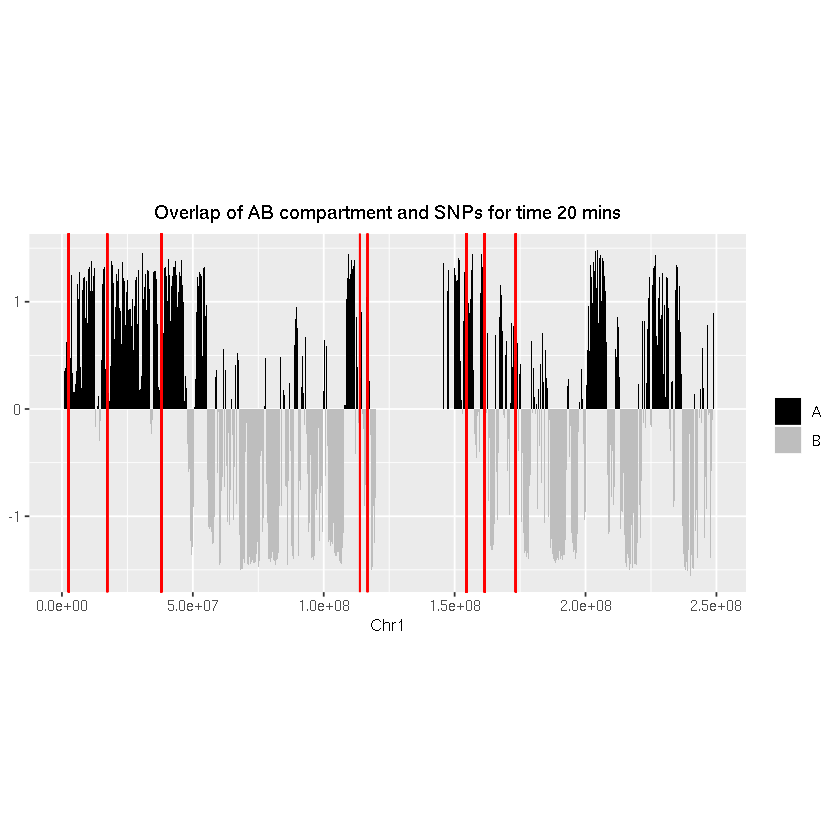

In [10]:
ggplot() +  geom_rect(data=compartment_T20_chr1_data, aes(xmin=start,xmax=end, ymin=ymin, ymax=ymax, fill=group, group=id)) + scale_fill_manual(values=c('black','grey')) +
 geom_rect(data=snps_chr1, aes(xmin=start, xmax=end, ymin=-Inf, ymax=+Inf, group=id), color='red', alpha=0.5)+ xlab('Chr1') + theme(aspect.ratio = 0.5, plot.title=element_text(hjust=0.5)) + 
scale_x_continuous(limits=c(0,NA)) + guides(fill=guide_legend(title="")) + ggtitle('Overlap of AB compartment and SNPs for time 20 mins')

